In [1]:
#Linear Regression
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.ioff()

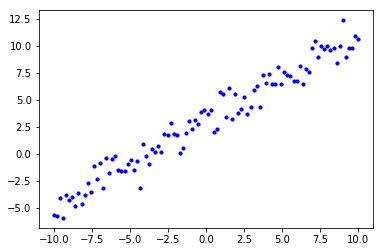

In [2]:
# Sample 100 points near a line
N = 100
M, C = .78, 3.07
X = np.linspace(-10, 10, N)
Y = (M*X + C) + np.random.randn(N)
plt.scatter(X, Y, s=10, c='b')

In [3]:
# Initialize m and c
m = 0
c = 0
i = 0

In [4]:
while i<1000:
    Y_hat = m*X + c
    costs = (Y_hat-Y)**2    
    loss = np.sum(costs)/N
    dY_hat = 2/N*(Y_hat-Y)
    dm = np.dot(dY_hat, X)
    dc = np.sum(dY_hat)
    m-=.001*dm
    c-=.001*dc
    if i%100==0:
        print('Loss = %f' %loss)
    i+=1


Loss = 31.683989
Loss = 7.210575
Loss = 5.149364
Loss = 3.768258
Loss = 2.842845
Loss = 2.222770
Loss = 1.807289
Loss = 1.528894
Loss = 1.342356
Loss = 1.217365


Original parameters: {m:0.780000, c: 3.070000}
Predicted parameters: {m:0.793225, c: 2.640986}


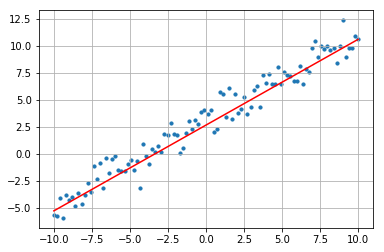

In [5]:
plt.grid()
plt.scatter(X, Y, 10)
plt.plot(X, m*X+c, 'r')
print("Original parameters: {m:%f, c: %f}" %(M, C))
print("Predicted parameters: {m:%f, c: %f}" %(m, c))


## Let us make our code modular


Initialize $\theta$<br>
i = 0 <br>
while i < 1000:<br>
    &nbsp;&nbsp;&nbsp;&nbsp;$Y_{hat}, loss = forwardProp(\theta, X, Y)$<br>
    &nbsp;&nbsp;&nbsp;&nbsp;$\partial \theta = backProp(X, Y_{hat}, Y)$<br>
    &nbsp;&nbsp;&nbsp;&nbsp;$\theta = update(\theta, \partial \theta)$<br>


The equations for forward (1st 2) and backward (last) prop are:
\begin{align}
& \hat Y = mX + c \\
& L = \frac1N \times \sum_{i=1}^{N} (\hat Y-Y)_i^2 \\
% & L =  \frac1N \times \sum_{i=1}^{N} (Y-(mX + c))_i^2 \\
& \frac{\partial{L}}{\partial \hat Y} = \frac2N \times (\hat Y-Y) \\
\end{align}

In [6]:
import numpy as np
class LinearRegression:
    def __init__(self, M=.78, C=3.07, num_steps=1000, learning_rate=.001):
        self.X, self.Y = self.sample_data(M, C)
        self.num_steps = num_steps
        self.learning_rate = learning_rate

    def sample_data(self, M, C, N=100):
        X = np.linspace(-10, 10, N)
        Y = (M*X + C) + np.random.randn(N)
        return X, Y

    def forward_prop(self, theta, X, Y):
        N = X.shape[0]
        m, c = theta['m'], theta['c']
        Y_hat = m*X + c
        costs = (Y_hat-Y)**2
        loss = np.sum(costs)/N
        return Y_hat, loss

    def back_prop(self, X, Y_hat, Y):
        N = X.shape[0]
        dY_hat = 2/N*(Y_hat-Y)
        dm = np.dot(dY_hat, X)
        dc = np.sum(dY_hat)
        dtheta = {'dm': dm, 'dc': dc}
        return dtheta

    def update(self, theta, dtheta):
        theta['m']-=self.learning_rate*dtheta['dm']
        theta['c']-=self.learning_rate*dtheta['dc']
        return theta

    def fit(self):
        self.theta = {'m': 0, 'c': 0}
        i = 0
        while i<self.num_steps:
            Y_hat, loss = self.forward_prop(self.theta, self.X, self.Y)
            dtheta = self.back_prop(self.X, Y_hat, self.Y)
            self.theta = self.update(self.theta, dtheta)
            if i%100==0:
                print('Loss=%f at %ith iteration' %(loss, i))
            i+=1

    def predict(self, x):
        return self.theta['m']*x + self.theta['c']

In [7]:
classifier = LinearRegression()
classifier.fit()

Loss=30.579322 at 0th iteration
Loss=6.534734 at 100th iteration
Loss=4.656103 at 200th iteration
Loss=3.397334 at 300th iteration
Loss=2.553894 at 400th iteration
Loss=1.988746 at 500th iteration
Loss=1.610068 at 600th iteration
Loss=1.356333 at 700th iteration
Loss=1.186318 at 800th iteration
Loss=1.072400 at 900th iteration


In [8]:
print('For X=100, Y_true = %f, Y_pred = %f' %(100*.78+3.07, classifier.predict(100)))

For X=100, Y_true = 81.070000, Y_pred = 81.553525
